# JP Morgen Project

## Task 2 - Create a prototype pricing model


They believe the winter will be colder than expected, so they want to buy gas now to store and sell in winter in order to take advantage of the resulting increase in gas prices.
The concept is simple: any trade agreement is as valuable as the price you can sell minus the price at which you are able to buy.


**Aim:** Write a function that is able to use the data you created previously to price the contract.

Write a function that takes these inputs and gives back the value of the contract. You can assume there is no transport delay and that interest rates are zero. Market holidays, weekends, and bank holidays need not be accounted for. Test your code by selecting a few sample inputs.

**Model input:**
>  1.   Injection dates.
>  2.   Withdrawal dates.
>  3.   The prices at which the commodity can be purchased/sold on those dates.
>  4.   The rate at which the gas can be injected/withdrawn.
>  5.   The maximum volume that can be stored.
>  6.   Storage costs.

**Model output:** estimated price model

- Price_sell/ _buy = Price * Volume
- Price_contract = Price_sell - Price_buy - cost
- cost = Gas_Inj_Withdraw + Storage + Transport
- Transport = Transport_per_time *2
- Storage = Storage_rate * Storage_time
- Storage_time = Withdraw_date - In_date


**Model Used in this File**


In [126]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gc # Garbage Collector interface
import math
from datetime import datetime, date
from prophet import Prophet
import seaborn as sns
import random


In [102]:
url = 'https://raw.githubusercontent.com/Hongyan-Wang/JP_Morgan_Project/main/Task1_Investigate_and_analyse_price_data/Nat_Gas.csv'
df = pd.read_csv(url,parse_dates =['Dates'],index_col='Dates')
df.reset_index(inplace = True)
df.rename(columns = {'Dates':'ds',
                     'Prices': 'y'}, inplace = True)
m= Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpps8ixfhh/8s9ffebo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpps8ixfhh/wxeezg0m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18369', 'data', 'file=/tmp/tmpps8ixfhh/8s9ffebo.json', 'init=/tmp/tmpps8ixfhh/wxeezg0m.json', 'output', 'file=/tmp/tmpps8ixfhh/prophet_modeljr_6s3wg/prophet_model-20230916185954.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:59:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:59:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [114]:
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

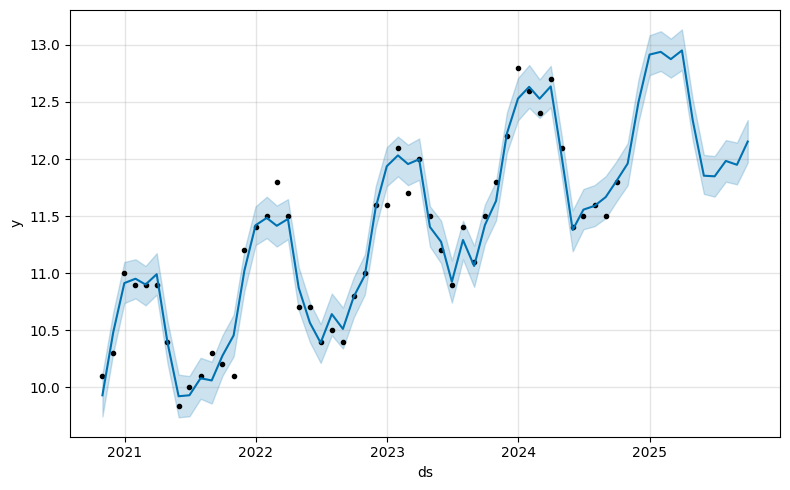

In [105]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(8)
fig1 = m.plot(forecast, ax=ax)

In [154]:
type(future)

pandas.core.frame.DataFrame

In [161]:
Date1 = ['2023-1-10', '2023-2-12','2023-3-31','2023-4-30']
df = pd.DataFrame(Date1, columns=['ds'])
date_price = m.predict(df).yhat
date_price

0    12.205612
1    11.432597
2    11.997849
3    11.404788
Name: yhat, dtype: float64

In [168]:
'''

Saved for later
in_dates = ['2023-1-31', '2023-2-28','2023-3-31','2023-4-30'] #injection dates
indate_index=[]
in_prices = []
for indate in in_dates:
#  indate_index.append(forecast[forecast.ds == indate].index.tolist()[0])
  in_date_index = forecast[forecast.ds == indate].index.tolist()[0]
  in_prices.append(forecast.yhat[forecast.ds == indate][in_date_index])
in_prices


def check_price(in_dates):
  in_prices = []
  for indate in in_dates:
    in_date_index = forecast[forecast.ds == indate].index.tolist()[0]
    in_prices.append(forecast.yhat[forecast.ds == indate][in_date_index])
  return in_prices

# check the function
in_dates = ['2023-1-31', '2023-2-28','2023-3-31','2023-4-30'] #injection dates
check_price(in_dates)


def date_str(in_dates):
  Date_list=[]
  for indate in in_dates:
    Date_list.append(datetime.strptime(indate, '%Y-%m-%d'))
  return Date_list
date_str(in_dates)
'''

"\n\nSaved for later\nin_dates = ['2023-1-31', '2023-2-28','2023-3-31','2023-4-30'] #injection dates\nindate_index=[]\nin_prices = []\nfor indate in in_dates:\n#  indate_index.append(forecast[forecast.ds == indate].index.tolist()[0])\n  in_date_index = forecast[forecast.ds == indate].index.tolist()[0]\n  in_prices.append(forecast.yhat[forecast.ds == indate][in_date_index])\nin_prices\n\n\ndef check_price(in_dates):\n  in_prices = []\n  for indate in in_dates:\n    in_date_index = forecast[forecast.ds == indate].index.tolist()[0]\n    in_prices.append(forecast.yhat[forecast.ds == indate][in_date_index])\n  return in_prices\n\n# check the function\nin_dates = ['2023-1-31', '2023-2-28','2023-3-31','2023-4-30'] #injection dates\ncheck_price(in_dates)\n\n\ndef date_str(in_dates):\n  Date_list=[]\n  for indate in in_dates:\n    Date_list.append(datetime.strptime(indate, '%Y-%m-%d'))\n  return Date_list\ndate_str(in_dates)\n"

In [224]:
# This is the function to calculate the contract price
# overall, the model form should be
'''
Price_sell/ _buy = Price * Volume
Price_contract = Price_sell - Price_buy - cost
cost = Gas_Inj_Withdraw + Storage + Transport
Transport = Transport_per_time *2
Storage = Storage_rate * Storage_time
Storage_time = Withdraw_date - In_date
'''
def Price_Contract_Value(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, total_vol, injection_withdrawal_cost_rate):
    volume = 0
    buy_cost = 0
    Price_out = 0
    # a series of in_dates and out_dates are input
    last_date = min(min(in_dates), min(out_dates))
    all_dates = sorted(set(in_dates + out_dates))

    for i in range(len(all_dates)):
        start_date = all_dates[i]

        if start_date in in_dates:
            if volume <= total_vol - rate:
                volume += rate
                # the price for buying gas
                buy_cost += rate * in_prices[in_dates.index(start_date)]
                # injection cost
                injection_cost = rate * injection_withdrawal_cost_rate
                buy_cost += injection_cost
                print('On %s, the gas is injected at a price of %s'%(start_date, in_prices[in_dates.index(start_date)]))

            else:
                print('On %s, injection gas is impossible, as there is insufficient space in the storage facility'%start_date)
        elif start_date in out_dates:
            if volume >= rate:
                volume -= rate
                Price_out += rate * out_prices[out_dates.index(start_date)]
                withdrawal_cost = rate * injection_withdrawal_cost_rate
                Price_out -= withdrawal_cost
                print('On %s, the gas is extracted at a price of %s'%(start_date, out_prices[out_dates.index(start_date)]))
            else:
                print('On %s, extracted is impossible, as there is insufficient volume of gas stored'%start_date)

    store_cost = math.ceil((max(out_dates) - min(in_dates)).days // 30) * storage_cost_rate
    Price_contract = Price_out - store_cost - buy_cost
    return Price_contract

In [218]:
in_dates = [date(2021, 6, 1), date(2021, 7, 1), date(2021, 8, 21), date(2021, 9,1)] #injection dates
in_dates_df = pd.DataFrame(in_dates, columns=['ds'])
#in_dates_date = pd.to_datetime(in_dates_df['ds'])
price_in = m.predict(in_dates_df).yhat
out_dates = [date(2021, 9, 27), date(2021, 10, 15), date(2021, 11, 20), date(2021, 12, 1)]  # extraction dates
out_dates_df = pd.DataFrame(out_dates, columns=['ds'])
#out_dates_date = pd.to_datetime(out_dates_df['ds'])
price_out = m.predict(out_dates_df).yhat
print('The prince in are',price_in)
print('---\n')
print('The prince out are',price_out)
print('---\n')

The prince in are 0     9.420668
1    10.152758
2     7.697118
3    10.322809
Name: yhat, dtype: float64
---

The prince out are 0    10.312572
1    11.222070
2    11.547475
3    10.923138
Name: yhat, dtype: float64
---



In [185]:
rate = 100000  # rate of gas in cubic feet per day
storage_cost_rate = 10000  # total volume in cubic feet
injection_withdrawal_cost_rate = 0.0005  # $/cf
max_storage_volume = 500000 # maximum storage capacity of the storage facility

# Model testing

In [225]:
result = Price_Contract_Value(in_dates, price_in,out_dates, out_prices, rate, storage_cost_rate, max_storage_volume, injection_withdrawal_cost_rate)
print()
print(f"The value of the contract is: ${result}")

On 2021-06-01, the gas is injected at a price of 9.42066804429589
On 2021-07-01, the gas is injected at a price of 10.15275809549765
On 2021-08-21, the gas is injected at a price of 7.697117542761603
On 2021-09-01, the gas is injected at a price of 10.322808865014585
On 2021-09-27, the gas is extracted at a price of 11.274686643290744
On 2021-10-15, the gas is extracted at a price of 10.924210220973713
On 2021-11-20, the gas is extracted at a price of 11.290744476771465
On 2021-12-01, the gas is extracted at a price of 11.062884299767763

The value of the contract is: $635517.3093233961
